<a href="https://colab.research.google.com/github/oanumnu/MIS-64061_oanumnu./blob/main/IMDB_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(keras)
library(cowplot)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
imdb <- dataset_imdb(num_words = 10000)
c(c(train_data, train_labels), c(test_data, test_labels)) %<-% imdb

In [3]:
# Converting data to binary data
vectorize_sequences <- function(sequences, dimension = 10000) { 
    # Create an all-zero matrix of shape (len(sequences), dimension)
  results <- matrix(0, nrow = length(sequences), ncol= dimension)
  for(i in 1:length(sequences))
        # Sets specific indices of results[i] to 1s
  results[i, sequences[[i]]] <- 1
  results
}

x_train <- vectorize_sequences(train_data)  # vectorized training data
x_test <- vectorize_sequences(test_data)    # vectorized test data
# vectorizing the labels
y_train <- as.numeric(train_labels)
y_test <- as.numeric(test_labels)
# structure of the vectorized samples
str(x_train[1,])

 num [1:10000] 1 1 0 1 1 1 1 1 1 0 ...


In [4]:
# Validating our approach
## Set apart 10,000 samples from the original training data for validation
val_indices <- 1:10000
x_val <- x_train[val_indices,]
partial_x_train <- x_train[-val_indices,]

y_val <- y_train[val_indices]
partial_y_train <- y_train[-val_indices]
sample_size = floor(0.8*nrow(rock))
set.seed(123)

picked = sample(seq_len(nrow(rock)),size = sample_size)
development =rock[picked,]
holdout =rock[-picked,]

### Let's run the original model

`geom_smooth()` using formula 'y ~ x'



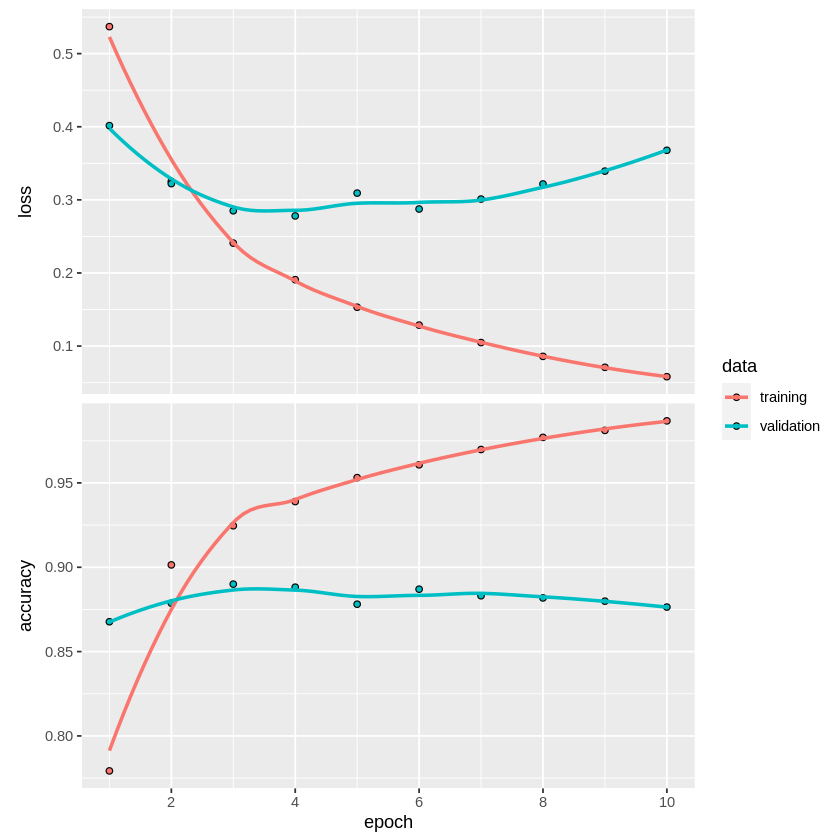

In [5]:
model1 <- keras_model_sequential() %>% 
  layer_dense(units = 16, activation = "relu", input_shape = c(10000)) %>% 
  layer_dense(units = 16, activation = "relu") %>% 
  layer_dense(units = 1, activation = "sigmoid")
model1 %>% compile(
  optimizer = "rmsprop",
  loss = "binary_crossentropy",
  metrics = c("accuracy"))
history <- model1 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 10,
  batch_size = 512,
  validation_data = list(x_val, y_val))

# visualize the model
plot(history)



*** Results ***
***  loss   0.3036      accuracy    0.8812 ***

`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.1020344 0.8652800

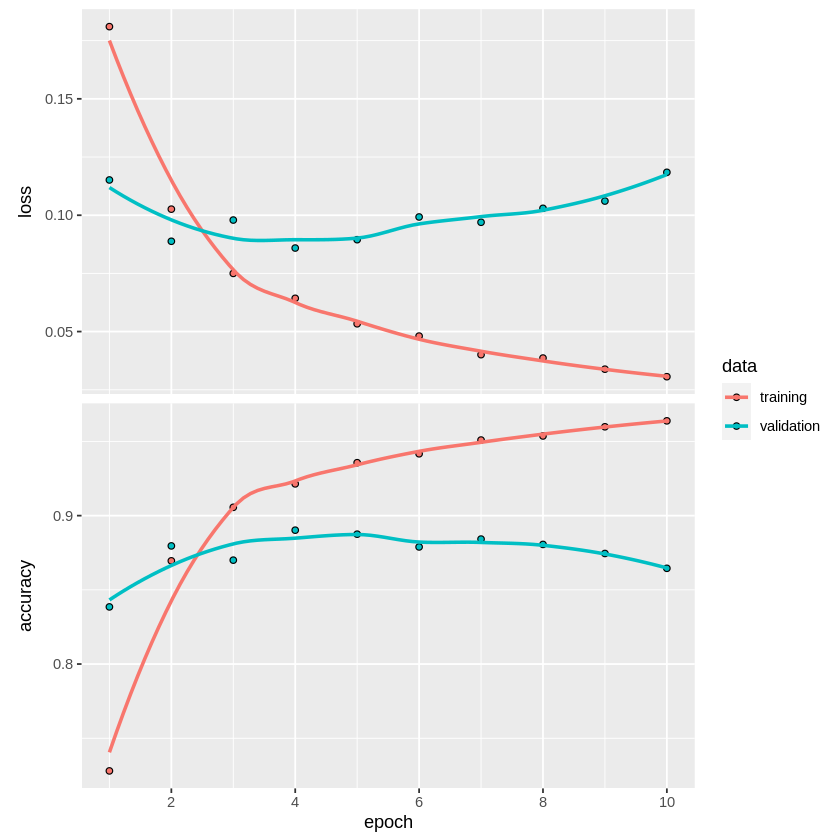

In [6]:
# Building a new Model with 3 Hidden Layers 64, 32, 16 and using dropout
set.seed(123)
model3 <- keras_model_sequential() %>% 
  layer_dense(units = 64, activation = "tanh",input_shape = c(10000)) %>%
    layer_dropout(rate = 0.5) %>%
  layer_dense(units = 32, activation = "tanh") %>%
    layer_dropout(rate = 0.5) %>%
  layer_dense(units = 16, activation = "tanh") %>%
    layer_dropout(rate = 0.5) %>%
  layer_dense(units = 1, activation = "sigmoid")
model3 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
history_3 <- model3 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 10,
  batch_size = 512,
  validation_data = list(x_val, y_val))

# visualize the model
plot(history_3)

  # Let's train a new network from scratch for 3 epochs and then evaluate it on the test data.
model4 <- keras_model_sequential() %>% 
  layer_dense(units = 64, activation = "tanh",input_shape = c(10000)) %>%
      layer_dropout(rate = 0.5) %>%
  layer_dense(units = 32, activation = "tanh") %>%
      layer_dropout(rate = 0.5) %>%
  layer_dense(units = 16, activation = "tanh") %>%
      layer_dropout(rate = 0.5) %>%
  layer_dense(units = 1, activation = "sigmoid")
model4 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
model4 %>% fit(x_train, y_train, epochs = 2, batch_size = 512)
results4 <- model4 %>% evaluate(x_test, y_test)
results4



`geom_smooth()` using formula 'y ~ x'



loss   accuracy 
0.08911711 0.87879997

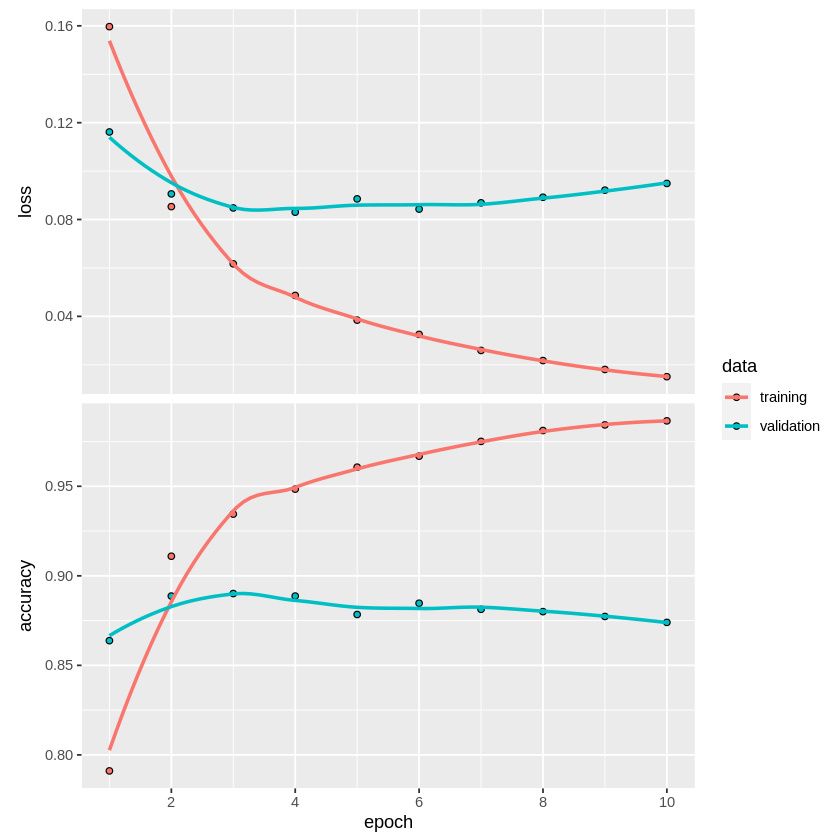

In [7]:
# Using 1 hidden layers with 32 units, tanh activation function, batch size 512, 12 epoch.
model2 <- keras_model_sequential() %>% 
  layer_dense(units = 32, activation = "tanh", input_shape = c(10000)) %>%
  layer_dense(units = 1, activation = "sigmoid")
model2 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))
history_2 <- model2 %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 10,
  batch_size = 512,
  validation_data = list(x_val, y_val))

# visualize the model
plot(history_2)

# Let's train a new network from scratch for 3 epochs and then evaluate it on the test data.
model2 <- keras_model_sequential() %>% 
  layer_dense(units = 32, activation = "tanh", input_shape = c(10000)) %>%
  layer_dense(units = 1, activation = "sigmoid")

model2 %>% compile(
  optimizer = "rmsprop",
  loss = "mse",
  metrics = c("accuracy"))

model2 %>% fit(x_train, y_train, epochs = 3   , batch_size = 512)
results1 <- model2 %>% evaluate(x_test, y_test)
results1